Значення сплайна:
x = 0.50, y = 1.830
x = 0.51, y = 1.890
x = 0.53, y = 1.943
x = 0.54, y = 1.990
x = 0.56, y = 2.030
x = 0.57, y = 2.064
x = 0.58, y = 2.093
x = 0.60, y = 2.116
x = 0.61, y = 2.134
x = 0.63, y = 2.146
x = 0.64, y = 2.154
x = 0.66, y = 2.157
x = 0.67, y = 2.156
x = 0.68, y = 2.151
x = 0.70, y = 2.142
x = 0.71, y = 2.129
x = 0.73, y = 2.113
x = 0.74, y = 2.093
x = 0.75, y = 2.071
x = 0.77, y = 2.046
x = 0.78, y = 2.018
x = 0.80, y = 1.989
x = 0.81, y = 1.957
x = 0.83, y = 1.923
x = 0.84, y = 1.888
x = 0.85, y = 1.852
x = 0.87, y = 1.815
x = 0.88, y = 1.777
x = 0.90, y = 1.738
x = 0.91, y = 1.699
x = 0.92, y = 1.660
x = 0.94, y = 1.622
x = 0.95, y = 1.583
x = 0.97, y = 1.545
x = 0.98, y = 1.508
x = 0.99, y = 1.472
x = 1.01, y = 1.438
x = 1.02, y = 1.405
x = 1.04, y = 1.373
x = 1.05, y = 1.343
x = 1.07, y = 1.315
x = 1.08, y = 1.288
x = 1.09, y = 1.262
x = 1.11, y = 1.238
x = 1.12, y = 1.216
x = 1.14, y = 1.196
x = 1.15, y = 1.177
x = 1.16, y = 1.160
x = 1.18, y = 1.144
x 

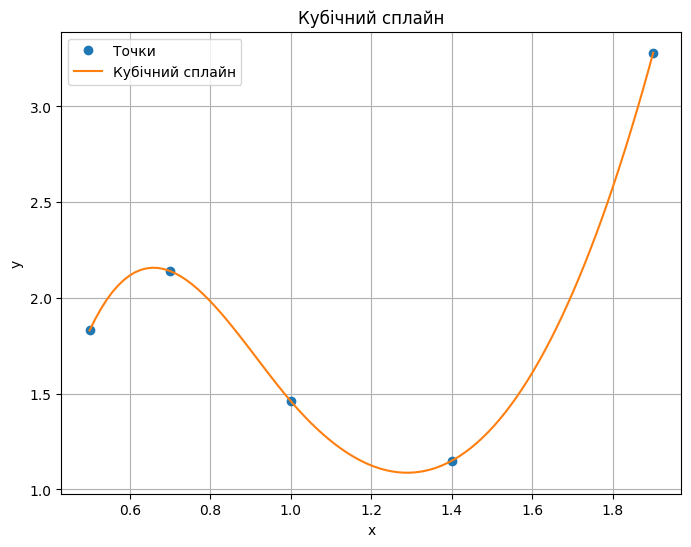

In [7]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.5, 0.7, 1, 1.4, 1.9])
y = np.array([1.83, 2.14, 1.46, 1.15, 3.28])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
    
l = np.ones(n)
v = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * v[i-1]
    v[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
for j in range(n - 2, -1, -1):
    c[j] = z[j] - v[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])
    
cs = CubicSpline(x, y)

x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

print("Значення сплайна:")

for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

#Графік

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()